In [6]:
%config InlineBackend.figure_formats = ['svg']
%run ../coronavirus.py

- Some plots look a little suspicous /  misleading
- lots of noise
- code base could do with refactoring
- explore that here

In [20]:
def plot_change_bar_dev(ax, series, color, rolling=None):
    change = series.diff().dropna()   # lose one point at beginning
    
    

    if rolling:
        rolling_label = f" {rolling}-day rolling mean"
        rolling_series = change.rolling(rolling, center=True).mean()
        bar_alpha = 0.2
    else:
        rolling_label = ""
        bar_alpha = 1.0

    label = series.country + " new " + series.label
    ax.bar(change.index, change.values, color=color, label=label, alpha=bar_alpha,
           linewidth=LW)
    if rolling:
        ax.plot(rolling_series.index, rolling_series.values, color=color, label=label + rolling_label,
                linewidth=LW)
    ax.legend()
    ax.set_ylabel('daily change')
    
    # exploration
    r2 = change.rolling(window=14, win_type='gaussian', 
                        center=True).mean(std=7)
    ax.plot(r2.index, r2.values, color='C2', 
            label= "r2", linewidth=LW)
    
    return ax



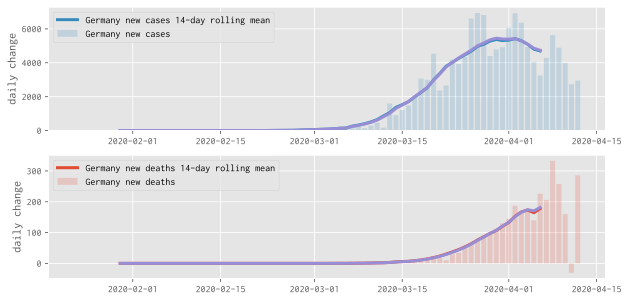

In [22]:
country = "Germany"
region, subregion = None, None
c, d = get_country_data(country, region=region, subregion=subregion)

fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False)
ax = axes[0]
plot_change_bar_dev(ax=ax, series=c, rolling=14, color="C1")
ax = axes[1]
plot_change_bar_dev(ax=ax, series=d, rolling=14, color="C0")

In [4]:
def overview(country, region=None, subregion=None, savefig=False):

    c, d = get_country_data(country, region=region, subregion=subregion)

    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=False)
    ax = axes[0]
    plot_time_step(ax=ax, series=c, style="-C1")
    plot_time_step(ax=ax, series=d, style="-C0")

    ax = axes[1]
    plot_change_bar_dev(ax=ax, series=c, rolling=7, color="C1")
    if country == "China":
        ax.set_ylim(0, 5000)

    ax = axes[2]
    plot_change_bar(ax=ax, series=d, rolling=7, color="C0")

    ax = axes[3]
    plot_growth_factor(ax, series=d, color="C0")
    plot_growth_factor(ax, series=c, color="C1")

    ax = axes[4]
    plot_doubling_time(ax, series=d, color="C0")
    plot_doubling_time(ax, series=c, color="C1")

    # enforce same x-axis on all plots
    for i in range(1, 5):
        axes[i].set_xlim(axes[0].get_xlim())
    for i in range(0, 5):
        axes[i].tick_params(left=True, right=True, labelleft=True, labelright=True)
        axes[i].yaxis.set_ticks_position('both')


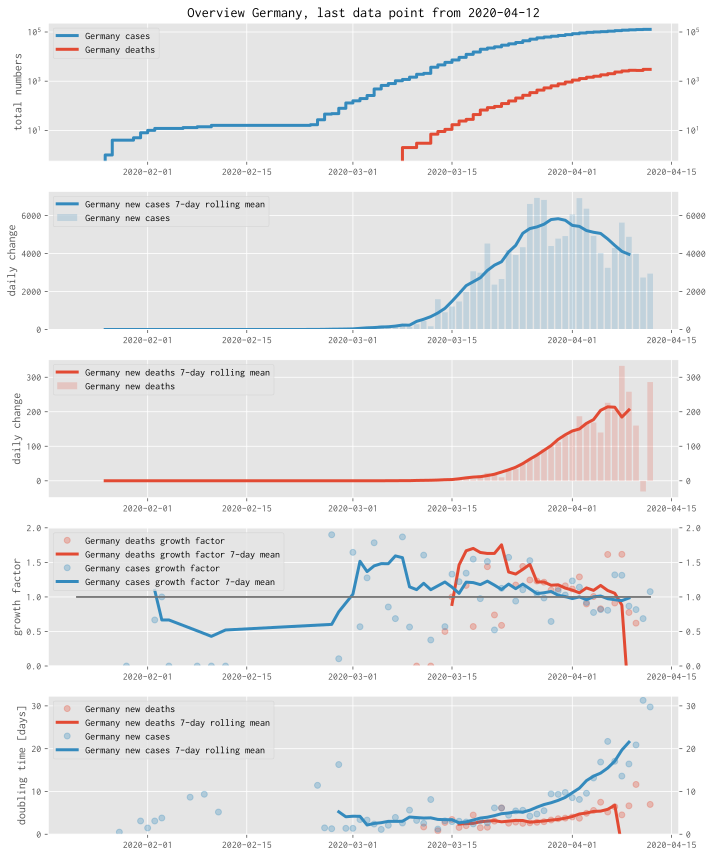

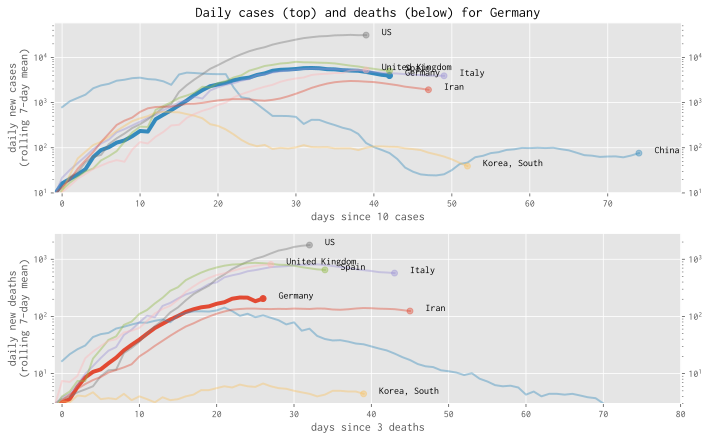

In [8]:
overview('Germany');